In [134]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline

import warnings
warnings.filterwarnings("ignore")
plt.style.use("ggplot")

In [107]:
ruta = r"C:\Users\Educa informatica\Downloads\Social_Network_Ads.csv"

df = pd.read_csv(ruta)

In [108]:
# Estructura del dataset
def estructura_dataset(df):
    print(f"Cantidad de filas: {df.shape[0]}")
    print(f"Cantidad de columnas: {df.shape[1]}")
    print(f"Cantidad de datos: {df.size}")
    print(f"Columnas: {df.columns}")
    
estructura_dataset(df)

Cantidad de filas: 400
Cantidad de columnas: 5
Cantidad de datos: 2000
Columnas: Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')


In [109]:
# Primera vista de los datos
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [110]:
# Valores nulos
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [111]:
# Valores duplicados
df.duplicated().sum()

0

In [112]:
# Información extra
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [113]:
# Eliminar User ID
df.drop(columns="User ID", axis=1, inplace=True)

In [114]:
# Renombrar EstimatedSalaray
df.rename(columns={"EstimatedSalary":"Estimated_Salary"}, inplace=True)

In [115]:
# Cardinalidad columna categórica
print("Cantidad de datos únicos:", df["Gender"].nunique())
print(f"Valores únicos {df['Gender'].unique()}")

Cantidad de datos únicos: 2
Valores únicos ['Male' 'Female']


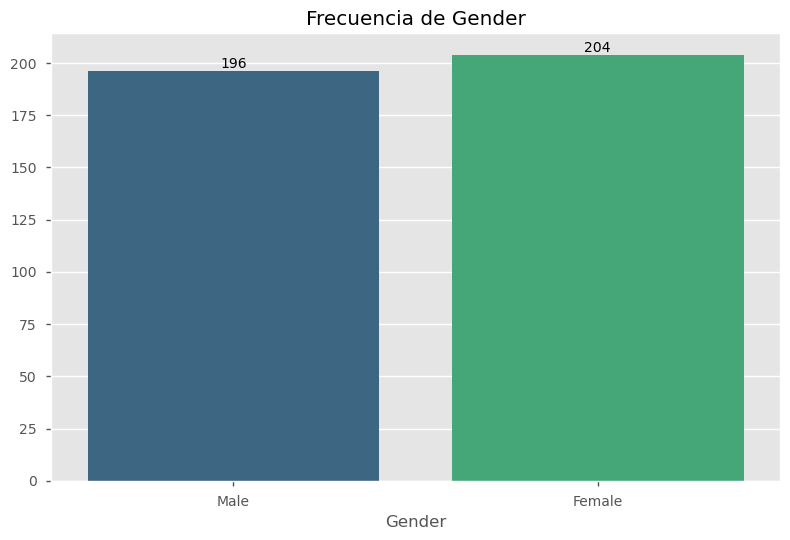

In [116]:
# Frecuencia de valores categóricos
g= sns.countplot(data=df, x="Gender", hue="Gender", palette="viridis", legend=False)
plt.title("Frecuencia de Gender")
plt.ylabel(None)

for patch in g.patches:
    height = patch.get_height()
    x = patch.get_x() + patch.get_width() / 2
    g.text(x, height, f"{int(height)}", ha="center", va="bottom", fontsize=10, color="black")
        
plt.tight_layout()

plt.show()

In [117]:
# Estadísticas
df.describe()

,Age,Estimated_Salary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [118]:
# Valores
for col in ["Age", "Estimated_Salary"]:
    print(df[col].value_counts())

Age
35    32
37    20
26    16
41    16
42    16
39    15
40    15
48    14
47    14
27    13
38    13
28    12
36    12
46    12
31    11
30    11
49    10
29    10
33     9
32     9
24     9
59     7
19     7
45     7
20     7
60     7
34     6
23     6
52     6
25     6
58     6
53     5
57     5
22     5
18     5
21     4
50     4
54     4
55     3
56     3
51     3
43     3
44     2
Name: count, dtype: int64
Estimated_Salary
72000     12
80000     11
79000     10
75000      9
71000      9
          ..
123000     1
37000      1
115000     1
148000     1
139000     1
Name: count, Length: 117, dtype: int64


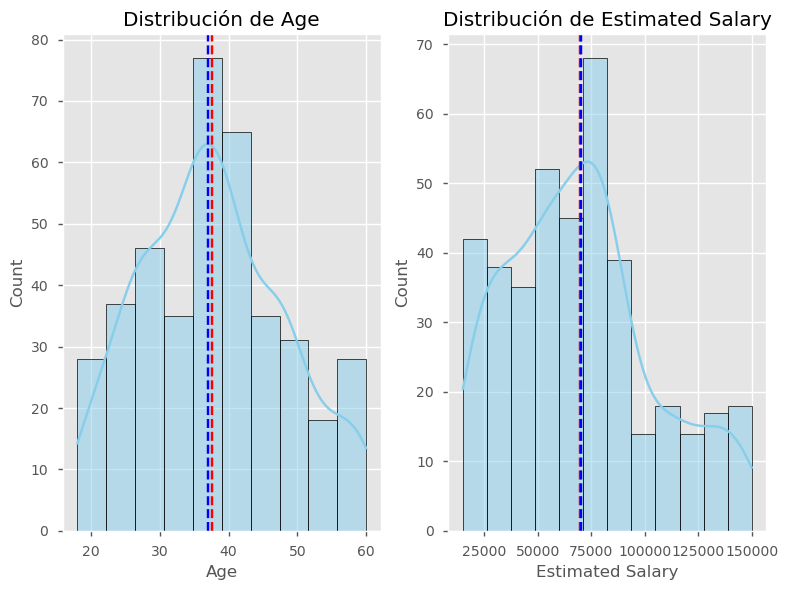

In [119]:
# Distribución de las variables numéricas
fig, axes = plt.subplots(1, 2, figsize=(8, 6))
axes = axes.flatten()

for i, col in enumerate(["Age", "Estimated_Salary"]):
    ax = axes[i]
    sns.histplot(data=df, x=col, color="skyblue", edgecolor="black", ax=ax, kde=True)
    ax.axvline(df[col].mean(), color="red", linestyle="--", label="Media")
    ax.axvline(df[col].median(), color="blue", linestyle="--", label="Mediana")
    ax.set_title(f"Distribución de {col.replace('_', ' ')}")
    ax.set_xlabel(col.replace("_", " "))
    
plt.tight_layout()

plt.show()

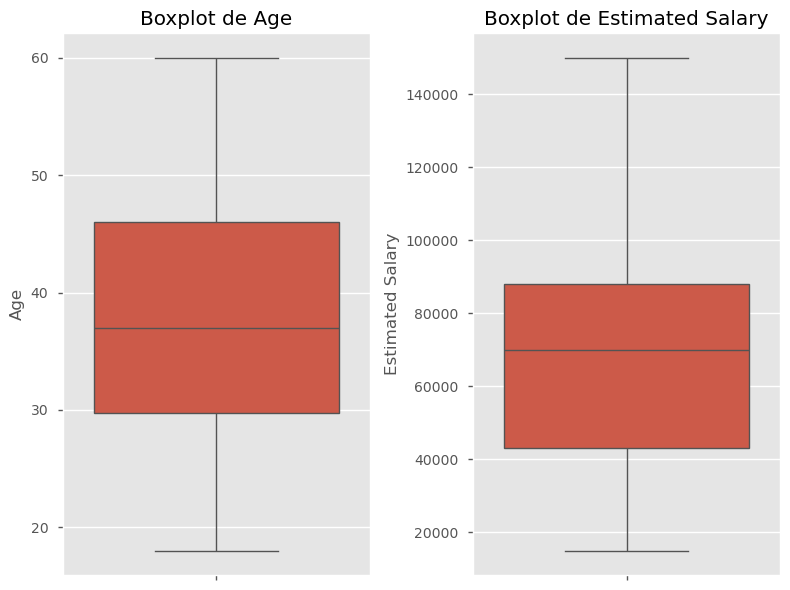

In [120]:
# Boxplot de las variables numéricas
fig, axes = plt.subplots(1, 2, figsize=(8, 6))
axes = axes.flatten()

for i, col in enumerate(["Age", "Estimated_Salary"]):
    ax = axes[i]
    sns.boxplot(data=df, y=col, ax=ax)
    ax.set_title(f"Boxplot de {col.replace('_', ' ')}")
    ax.set_ylabel(col.replace("_", " "))
    
plt.tight_layout()

plt.show()

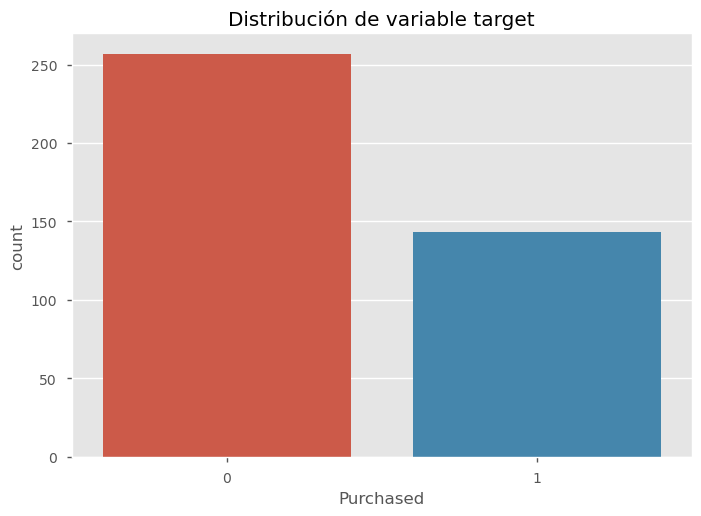

In [121]:
# Variable target
sns.countplot(data=df, x="Purchased", hue="Purchased", legend=False)
plt.title("Distribución de variable target")

plt.show()

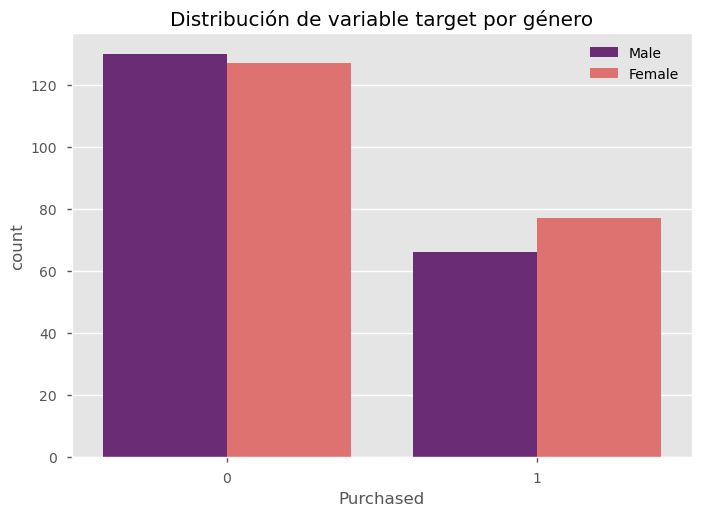

In [122]:
# Género y target
sns.countplot(data=df, x="Purchased", hue="Gender", palette="magma")
plt.title("Distribución de variable target por género")
plt.legend(frameon=False)

plt.show()

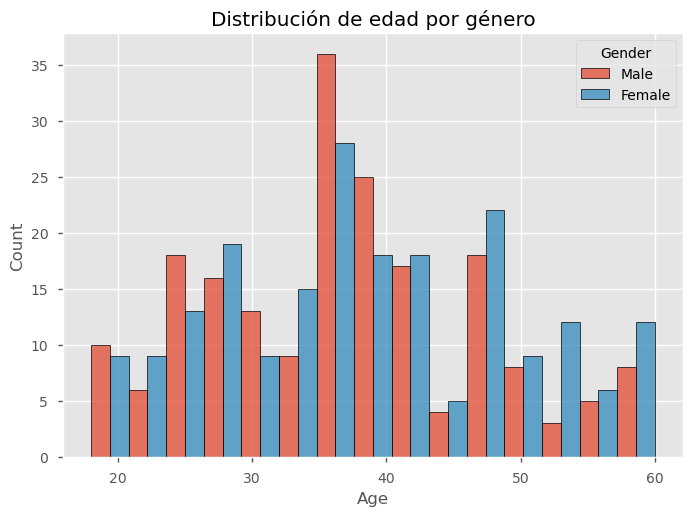

In [123]:
# Edad por género
sns.histplot(data=df, x="Age", hue="Gender", multiple="dodge", edgecolors="black", bins=15)
plt.title("Distribución de edad por género")

plt.show()

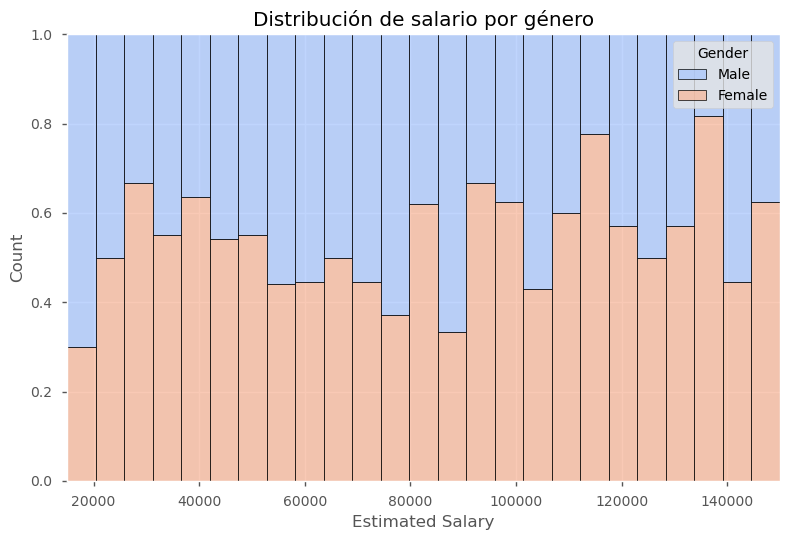

In [124]:
# Salario por género
sns.histplot(data=df, x="Estimated_Salary", hue="Gender", multiple="fill", edgecolor="black", bins=25, palette="coolwarm")
plt.title("Distribución de salario por género")
plt.xlabel("Estimated Salary")

plt.tight_layout()

plt.show()

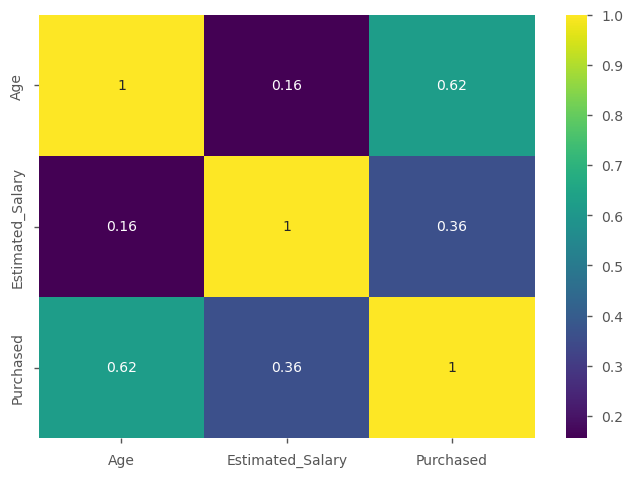

In [125]:
# Correlación
correlacion = df.corr(numeric_only=True)

sns.heatmap(correlacion, annot=True, cmap="viridis")

plt.show()

In [126]:
# Media y mediana de ganancias por género
df.groupby("Gender")["Estimated_Salary"].agg(["mean", "median"])

,mean,median
Gender,,
Female,71759.803922,70500.0
Male,67642.857143,68000.0


In [127]:
# Media y mediana de edad por género
df.groupby("Gender")["Age"].agg(["mean", "median"])

,mean,median
Gender,,
Female,38.411765,37.5
Male,36.867347,36.5


In [128]:
# Compras por género
df.groupby("Gender")["Purchased"].value_counts(normalize=True)

Gender  Purchased
Female  0            0.622549
        1            0.377451
Male    0            0.663265
        1            0.336735
Name: proportion, dtype: float64

In [129]:
X = df.drop("Purchased", axis=1) # Features

y = df["Purchased"] # Target

In [130]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y) # Entrenamiento y prueba

print(X_train.shape)
print(X_test.shape)

(320, 3)
(80, 3)


In [131]:
gender_map = {"Male":0, "Female":1} # Mapear los datos categóricos

X_train["Gender"] = X_train["Gender"].map(gender_map)

X_test["Gender"] = X_test["Gender"].map(gender_map)

In [132]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 320 entries, 213 to 330
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Gender            320 non-null    int64
 1   Age               320 non-null    int64
 2   Estimated_Salary  320 non-null    int64
dtypes: int64(3)
memory usage: 10.0 KB


In [133]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 80 entries, 361 to 364
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Gender            80 non-null     int64
 1   Age               80 non-null     int64
 2   Estimated_Salary  80 non-null     int64
dtypes: int64(3)
memory usage: 2.5 KB


In [ ]:
pipe_log = make_pipeline(StandardScaler(), 
                         GaussianNB()) # Pipeline para estandarizar datos y aplicar NB Gausiano

pipe_log.fit(X_train, y_train) # Aplicamos al conjunto de entrenamiento

y_pred = pipe_log.predict(X_test) # Predicción

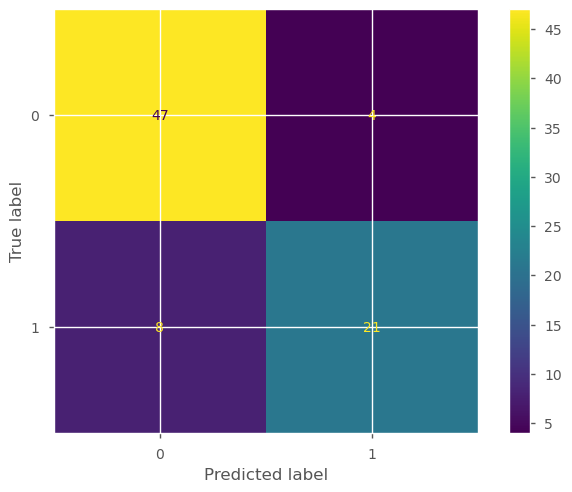

In [ ]:
conf_mat = confusion_matrix(y_test, y_pred) # Matriz de confusión

disp = ConfusionMatrixDisplay(conf_mat) # Gráfico de la matriz de confusión

disp.plot(cmap="viridis")

In [143]:
# Accuracy
print(f"Accuracy score: {accuracy_score(y_test, y_pred) * 100} %")

Accuracy score: 85.0 %


In [139]:
# Reporte de clasificación
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.92      0.89        51
           1       0.84      0.72      0.78        29

    accuracy                           0.85        80
   macro avg       0.85      0.82      0.83        80
weighted avg       0.85      0.85      0.85        80



In [146]:
# Validación cruzada
from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits=10, random_state=0, shuffle=True)
cv_results = cross_val_score(GaussianNB(), X_train, y_train, cv=kfold, scoring="accuracy")
print(f"Valores de la validación cruzada: {cv_results}\n")
print(f"Media de la validación cruzada: {cv_results.mean()}")

Valores de la validación cruzada: [0.875   0.84375 0.78125 0.96875 0.9375  0.875   0.875   0.875   0.96875
 0.9375 ]

Media de la validación cruzada: 0.89375
